<a href="https://colab.research.google.com/github/SILVIAIRENE/Data-Scientist-Machine-Learning-Engineer-Introductory-Course/blob/master/Problema_de_Fuji_Shimoyama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


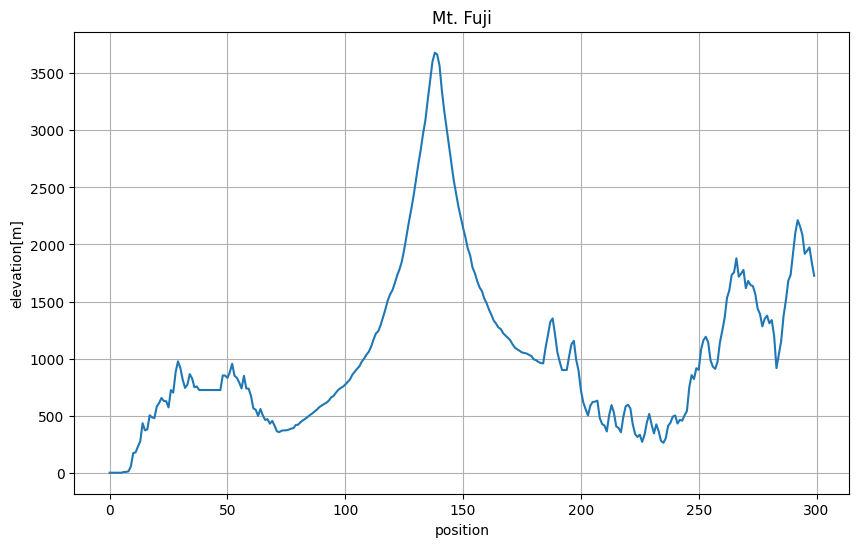

La pendiente en la posición 136 es: 168.35000000000036
Desde la posición 136, el próximo destino es la posición: 102
Ruta de descenso desde la posición 136: [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


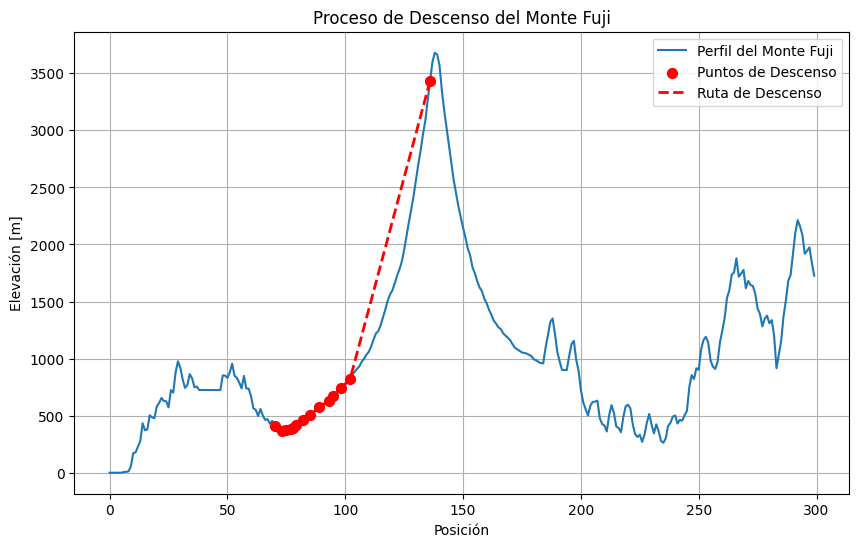

In [ ]:
import numpy as np

csv_path = "mtfuji_data (1).csv"  # Especifique el nombre del archivo (ruta).

np.set_printoptions(
    suppress=True
)  # Establecer la prohibición de visualización exponencial.
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
print(fuji[130:140])

#1
# Obtener la columna de número de punto (posición) y la de elevación
position = fuji[:, 0]
elevation = fuji[:, 3]

# Dibujar el gráfico de sección transversal del Monte Fuji
plt.figure(figsize=(10, 6))
plt.plot(position, elevation)
plt.title("Mt. Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.grid(True)
plt.show()
#2
def compute_slope(current_position, elevation_data):
    """
    Calcula la pendiente entre un punto dado y el punto anterior.

    Args:
      current_position (int): El índice del punto actual.
      elevation_data (np.ndarray): El ndarray con los datos de elevación.

    Returns:
      float: La pendiente en el punto actual.
    """
    # Evitar índices negativos
    if current_position <= 0:
        return 0.0

    # Pendiente = (cambio en Y) / (cambio en X)
    delta_y = elevation_data[current_position] - elevation_data[current_position - 1]
    delta_x = current_position - (current_position - 1)

    slope = delta_y / delta_x
    return slope

# Ejemplo de uso
slope_at_136 = compute_slope(136, fuji[:, 3])
print(f"La pendiente en la posición 136 es: {slope_at_136}")
#3
def compute_destination(current_position, elevation_data, alpha=0.2):
    """
    Calcula el próximo destino de descenso usando el gradiente.

    Args:
      current_position (int): El índice del punto actual.
      elevation_data (np.ndarray): Los datos de elevación.
      alpha (float): La tasa de aprendizaje (hiperparámetro).

    Returns:
      int: La próxima posición de descenso (redondeada).
    """
    slope = compute_slope(current_position, elevation_data)
    next_position = current_position - alpha * slope

    # Redondear y asegurar que el índice no sea negativo
    return int(np.round(max(0, next_position)))

# Ejemplo de uso
next_pos_from_136 = compute_destination(136, fuji[:, 3], alpha=0.2)
print(f"Desde la posición 136, el próximo destino es la posición: {next_pos_from_136}")
#4

def descend_fuji(start_position, elevation_data, alpha=0.2):
    """
    Baja la montaña desde una posición inicial, registrando cada paso.

    Args:
      start_position (int): La posición inicial.
      elevation_data (np.ndarray): Los datos de elevación.
      alpha (float): La tasa de aprendizaje.

    Returns:
      list: Una lista con todas las posiciones del descenso.
    """
    path = [start_position]
    current_position = start_position

    # Bucle hasta que el movimiento sea insignificante (punto de destino = punto actual)
    while True:
        next_position = compute_destination(current_position, elevation_data, alpha)
        if next_position == current_position:
            break
        path.append(next_position)
        current_position = next_position

    return path

# Ejemplo de uso
descent_path = descend_fuji(136, fuji[:, 3], alpha=0.2)
print(f"Ruta de descenso desde la posición 136: {descent_path}")
5#

# Trazar el perfil del monte Fuji
plt.figure(figsize=(10, 6))
plt.plot(position, elevation, label='Perfil del Monte Fuji')
plt.title("Proceso de Descenso del Monte Fuji")
plt.xlabel("Posición")
plt.ylabel("Elevación [m]")

# Trazar los puntos del descenso
path_elevations = fuji[descent_path, 3]
plt.scatter(descent_path, path_elevations, color='red', s=50, zorder=5, label='Puntos de Descenso')
plt.plot(descent_path, path_elevations, color='red', linestyle='--', linewidth=2, label='Ruta de Descenso')

plt.legend()
plt.grid(True)
plt.show()

#6

# Calcular el descenso para cada posición inicial posible
all_descent_paths = {}
for start_pos in range(len(elevation)):
    all_descent_paths[start_pos] = descend_fuji(start_pos, fuji[:, 3])

print(f"Calculadas las rutas de descenso para {len(all_descent_paths)} posiciones iniciales.")

#7
# Visualizar el descenso para algunas posiciones iniciales
start_positions_to_plot = [136, 142, 200, 250]

plt.figure(figsize=(12, 8))
plt.plot(position, elevation, color='lightgray', label='Perfil del Monte Fuji')

colors = ['blue', 'green', 'orange', 'purple']
for i, start_pos in enumerate(start_positions_to_plot):
    path = all_descent_paths[start_pos]
    path_elevations = fuji[path, 3]

    plt.plot(path, path_elevations, marker='o', linestyle='-', label=f'Inicio en {start_pos}', color=colors[i])

plt.title("Visualización del Descenso para Diferentes Valores Iniciales")
plt.xlabel("Posición")
plt.ylabel("Elevación [m]")
plt.legend()
plt.grid(True)
plt.show()
#8

start_position = 136
alphas_to_test = [0.1, 0.2, 0.5, 0.8]

plt.figure(figsize=(12, 8))
plt.plot(position, elevation, color='lightgray', label='Perfil del Monte Fuji')

colors = ['red', 'blue', 'green', 'purple']
for i, alpha in enumerate(alphas_to_test):
    path = descend_fuji(start_position, fuji[:, 3], alpha=alpha)
    path_elevations = fuji[path, 3]

    plt.plot(path, path_elevations, marker='o', linestyle='-', label=f'alpha = {alpha}', color=colors[i])

plt.title("Impacto del Hiperparámetro 'alpha' en el Descenso")
plt.xlabel("Posición")
plt.ylabel("Elevación [m]")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')